In [6]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

In [7]:
iris = pd.read_csv('iris.csv')
data = iris.iloc[:, [0, 1, 2, 3]].values

In [12]:
df_iris = pd.DataFrame(iris, columns = iris.columns.values)
df_iris.head() 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


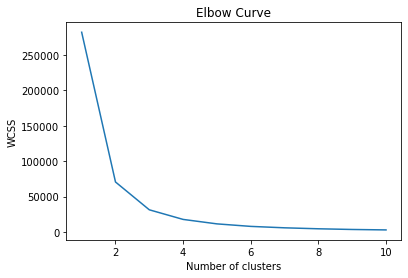

In [13]:
# Perform the elbow method
wcss = [] # Within-Cluster Sum of Squares (WCSS) 
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    
    
# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The elbow method is used for selecting the optimal number of clusters for a given dataset. The point where the elbow occurs is considered as optimal number of clusters. So, we can choose "3" as number of clusters

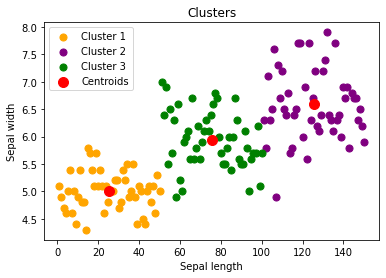

In [14]:
# Perform clustering with the optimal number of clusters
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_pred = kmeans.fit_predict(data)

# Plot the clusters with labels
plt.scatter(data[y_pred == 0, 0], data[y_pred == 0, 1], s=50, c='orange', label='Cluster 1')
plt.scatter(data[y_pred == 1, 0], data[y_pred == 1, 1], s=50, c='purple', label='Cluster 2')
plt.scatter(data[y_pred == 2, 0], data[y_pred == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids')
plt.title('Clusters')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()
plt.show()